In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\mercedes_benz_sales_2020_2025.csv")

In [8]:
df.shape

(12132666, 9)

In [9]:
df.head()

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes


In [10]:
df.dtypes

Model               object
Year                 int64
Region              object
Color               object
Fuel Type           object
Base Price (USD)     int64
Horsepower           int64
Sales Volume         int64
Turbo               object
dtype: object

In [11]:
df.info

<bound method DataFrame.info of              Model  Year  Region   Color Fuel Type  Base Price (USD)  \
0          A-Class  2020  Global  Yellow    Diesel             41265   
1          A-Class  2020  Global   Black    Petrol             51023   
2          A-Class  2020  Global    Grey    Petrol             72819   
3          A-Class  2020  Global   Black    Petrol             62480   
4          A-Class  2020  Global   White    Petrol             35189   
...            ...   ...     ...     ...       ...               ...   
12132661  AMG S 63  2025  Global  Silver  Electric            219647   
12132662  AMG S 63  2025  Global    Grey  Electric            251632   
12132663  AMG S 63  2025  Global    Grey    Hybrid            260947   
12132664  AMG S 63  2025  Global    Grey  Electric            311030   
12132665  AMG S 63  2025  Global  Silver  Electric            383516   

          Horsepower  Sales Volume Turbo  
0                252             1   Yes  
1                

In [12]:
df.isnull().sum()

Model               0
Year                0
Region              0
Color               0
Fuel Type           0
Base Price (USD)    0
Horsepower          0
Sales Volume        0
Turbo               0
dtype: int64

In [13]:
 corr = df['Horsepower'].corr(df['Base Price (USD)'])

In [14]:
print(corr)

0.44327422872287897


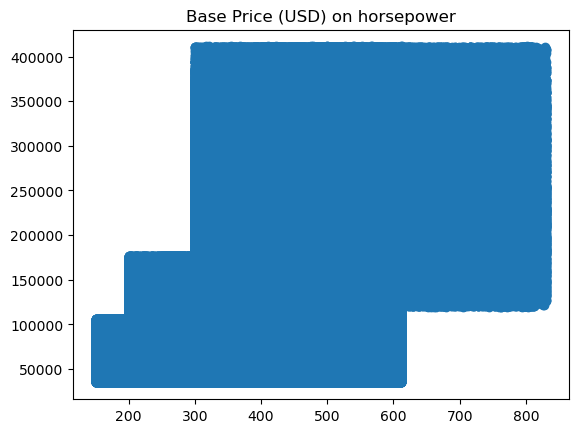

In [15]:
plt.scatter(df['Horsepower'],(df['Base Price (USD)']))
plt.title('Base Price (USD) on horsepower')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn .preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
x= df.drop(['Model','Year','Region','Color','Fuel Type','Horsepower','Sales Volume','Turbo'],axis=1)
y = df['Base Price (USD)']

In [18]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [19]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [20]:
numerical_transformer=Pipeline(steps=[
                             ('imputer',SimpleImputer(strategy='mean')),
                             ('scaler',StandardScaler())
])

In [21]:
categorical_transformer=Pipeline(steps=[
                               ('imputer',SimpleImputer(strategy='most_frequent')),
                               ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
                               ('num',numerical_transformer,numerical_cols),
                                ('cat',categorical_transformer,categorical_cols)
])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_1 =Pipeline(steps=[
                      ('pre',preprocessor),('reg',LinearRegression())
])

In [27]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Base Price (USD)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', LinearRegression())])

In [28]:
prediction_1 = model_1 .predict(X_test)




print(f'Accuracy:{r2_score(y_test,prediction_1)*100:.2f}')

Accuracy:100.00
